## Loading libraries and dataset

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# To supress the warnings
import warnings
warnings.filterwarnings("ignore")

owners = pd.read_csv(r'C:\Users\nick2\Desktop\MS\Denver Broncos\owners.csv')
details = pd.read_csv(r'C:\Users\nick2\Desktop\MS\Denver Broncos\procedure_details.csv')
pets = pd.read_csv(r'C:\Users\nick2\Desktop\MS\Denver Broncos\pets.csv')
procedures = pd.read_csv(r'C:\Users\nick2\Desktop\MS\Denver Broncos\procedures.csv')

# Exploring datasets
### 1. Owners

In [72]:
owners.shape

(89, 8)

In [73]:
owners.head()

,OwnerID,Name,Surname,StreetAddress,City,State,StateFull,ZipCode
0,6049,Debbie,Metivier,315 Goff Avenue,Grand Rapids,MI,Michigan,49503
1,2863,John,Sebastian,3221 Perry Street,Davison,MI,Michigan,48423
2,3518,Connie,Pauley,1539 Cunningham Court,Bloomfield Township,MI,Michigan,48302
3,3663,Lena,Haliburton,4217 Twin Oaks Drive,Traverse City,MI,Michigan,49684
4,1070,Jessica,Velazquez,3861 Woodbridge Lane,Southfield,MI,Michigan,48034


In [74]:
owners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 8 columns):
OwnerID          89 non-null int64
Name             89 non-null object
Surname          89 non-null object
StreetAddress    89 non-null object
City             89 non-null object
State            89 non-null object
StateFull        89 non-null object
ZipCode          89 non-null int64
dtypes: int64(2), object(6)
memory usage: 5.6+ KB


### 2. Pets 

In [75]:
pets.shape

(100, 6)

In [76]:
pets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
PetID      100 non-null object
Name       100 non-null object
Kind       100 non-null object
Gender     100 non-null object
Age        100 non-null int64
OwnerID    100 non-null int64
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [77]:
pets.head()

,PetID,Name,Kind,Gender,Age,OwnerID
0,J6-8562,Blackie,Dog,male,11,5168
1,Q0-2001,Roomba,Cat,male,9,5508
2,M0-2904,Simba,Cat,male,1,3086
3,R3-7551,Keller,Parrot,female,2,7908
4,P2-7342,Cuddles,Dog,male,13,4378


### 3. Procedures

In [78]:
procedures.shape

(41, 4)

In [79]:
procedures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
PetID               41 non-null object
Date                41 non-null object
ProcedureType       41 non-null object
ProcedureSubCode    41 non-null int64
dtypes: int64(1), object(3)
memory usage: 1.4+ KB


In [80]:
procedures.head()

,PetID,Date,ProcedureType,ProcedureSubCode
0,T0-3277,1/22/2016,VACCINATIONS,5
1,G6-6501,1/29/2016,VACCINATIONS,5
2,P9-3625,1/30/2016,ORTHOPEDIC,7
3,F1-1855,2/2/2016,VACCINATIONS,5
4,S1-2243,2/4/2016,VACCINATIONS,5


### 4. Procedure Details

In [81]:
details.shape

(41, 4)

In [82]:
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
ProcedureType       41 non-null object
ProcedureSubCode    41 non-null int64
Description         41 non-null object
Price               41 non-null int64
dtypes: int64(2), object(2)
memory usage: 1.4+ KB


In [83]:
details.head()

,ProcedureType,ProcedureSubCode,Description,Price
0,OFFICE FEES,1,Office Call,32
1,OFFICE FEES,2,Emergency,100
2,OFFICE FEES,3,Reck,24
3,GROOMING,1,Bath,15
4,GROOMING,2,Flea Dip,15


## Data Exploration
Let's see how many unique pet ID's, ownerID's, procedure types we have, as these are going to be the keys on which we will be merging the dataframes.

In [84]:
print('Unique petIDs in pets df: {}'.format(pets['PetID'].unique().shape[0]))
print('Unique petIDs in procedures df: {}'.format(procedures['PetID'].unique().shape[0]))

Unique petIDs in pets df: 100
Unique petIDs in procedures df: 34


In [85]:
print('Unique OwnersIDs in owners df: {}'.format(owners['OwnerID'].unique().shape[0]))
print('Unique OwnerIDs in pets df: {}'.format(pets['OwnerID'].unique().shape[0]))

Unique OwnersIDs in owners df: 89
Unique OwnerIDs in pets df: 89


In [86]:
print('Unique Procedure types in procedures df: {}'.format(procedures['ProcedureType'].unique().shape[0]))
print('Unique Procedure types in details df: {}'.format(details['ProcedureType'].unique().shape[0]))

Unique Procedure types in procedures df: 4
Unique Procedure types in details df: 6


In [87]:
print(procedures['ProcedureType'].unique())
procedures['ProcedureSubCode'].unique()


['VACCINATIONS' 'ORTHOPEDIC' 'GROOMING' 'GENERAL SURGERIES']


array([ 5,  7,  3,  1,  8,  9, 17], dtype=int64)

In [88]:
print(details['ProcedureType'].unique())
details['ProcedureSubCode'].unique()

['OFFICE FEES' 'GROOMING' 'VACCINATIONS' 'HOSPITALIZATION' 'ORTHOPEDIC'
 'GENERAL SURGERIES']


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19], dtype=int64)

- So, we have 100 pet ID's but have only details for 24 pets for their procedures.
- We have 89 unique owners in both owners and pets dataframe, most probably there's not going to be any loss of information on joining these dataframes, unless of course these unique id's are different for some records. I would still choose to go with full outer join first and then see if there is any loss of information.
- Then I would use inner join to keep only the common records between owners, pets and procedures if I want to analyze data about procedures on these pets
- For procedure types also we have only 4 procedures in common for procedures and procedure details dataframe.

In [89]:
# Joining Owners and Pets dataframe
df = pd.merge(owners, pets, on='OwnerID', how='outer')

In [90]:
df.head()

,OwnerID,Name_x,Surname,StreetAddress,City,State,StateFull,ZipCode,PetID,Name_y,Kind,Gender,Age
0,6049,Debbie,Metivier,315 Goff Avenue,Grand Rapids,MI,Michigan,49503,I6-9459,Biscuit,Dog,female,4
1,2863,John,Sebastian,3221 Perry Street,Davison,MI,Michigan,48423,R4-6131,Biscuit,Dog,female,5
2,3518,Connie,Pauley,1539 Cunningham Court,Bloomfield Township,MI,Michigan,48302,N6-7350,Biscuit,Dog,female,8
3,3663,Lena,Haliburton,4217 Twin Oaks Drive,Traverse City,MI,Michigan,49684,U4-6674,Biscuit,Dog,female,1
4,1070,Jessica,Velazquez,3861 Woodbridge Lane,Southfield,MI,Michigan,48034,U8-6473,Biscuit,Dog,female,3


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 13 columns):
OwnerID          100 non-null int64
Name_x           100 non-null object
Surname          100 non-null object
StreetAddress    100 non-null object
City             100 non-null object
State            100 non-null object
StateFull        100 non-null object
ZipCode          100 non-null int64
PetID            100 non-null object
Name_y           100 non-null object
Kind             100 non-null object
Gender           100 non-null object
Age              100 non-null int64
dtypes: int64(3), object(10)
memory usage: 10.9+ KB


In [92]:
df.shape

(100, 13)

In [93]:
# No loss of infromation is there till now
# Now merging it with procedures
df1=pd.merge(df, procedures, on='PetID', how='inner')

In [94]:
df1.shape

(41, 16)

In [95]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 40
Data columns (total 16 columns):
OwnerID             41 non-null int64
Name_x              41 non-null object
Surname             41 non-null object
StreetAddress       41 non-null object
City                41 non-null object
State               41 non-null object
StateFull           41 non-null object
ZipCode             41 non-null int64
PetID               41 non-null object
Name_y              41 non-null object
Kind                41 non-null object
Gender              41 non-null object
Age                 41 non-null int64
Date                41 non-null object
ProcedureType       41 non-null object
ProcedureSubCode    41 non-null int64
dtypes: int64(4), object(12)
memory usage: 5.4+ KB


In [96]:
df1.head()

,OwnerID,Name_x,Surname,StreetAddress,City,State,StateFull,ZipCode,PetID,Name_y,Kind,Gender,Age,Date,ProcedureType,ProcedureSubCode
0,1070,Jessica,Velazquez,3861 Woodbridge Lane,Southfield,MI,Michigan,48034,U8-6473,Biscuit,Dog,female,3,7/10/2016,VACCINATIONS,5
1,1070,Jessica,Velazquez,3861 Woodbridge Lane,Southfield,MI,Michigan,48034,U8-6473,Biscuit,Dog,female,3,8/19/2016,GROOMING,1
2,2419,Luisa,Cuellar,1308 Shingleton Road,Kalamazoo,MI,Michigan,49007,P0-1725,Lily,Dog,female,0,7/6/2016,GROOMING,3
3,6194,Karen,Torres,3941 Ritter Avenue,Center Line,MI,Michigan,48015,O6-3123,Biscuit,Dog,female,2,9/11/2016,VACCINATIONS,5
4,5833,Mary,Hurtado,4865 Juniper Drive,Saint Charles,MI,Michigan,48655,T0-5705,Biscuit,Dog,female,5,11/4/2016,VACCINATIONS,5


## Q-1
- Which pet (enter pet's name) had the most procedures? 

In [97]:
df1.groupby('PetID').count()['Kind'].sort_values(ascending=False).head(1)

PetID
J8-7429    3
Name: Kind, dtype: int64

In [98]:
pets[pets['PetID']=="J8-7429"]['Name']

57    Bonaparte
Name: Name, dtype: object

# Answer-1 
- Bonaparte had most procedures

In [99]:
# merging df1 with procedure details
# Using Inner join beacuse we have price information for particular kind of procedures only
# Also merging on basis of two columns beacuse each procedure has different procedure subcodes, I do not want any null
# -- values in the merged dataframe. So instead of clearing them later I'm joining the tables this way at first place.

df2 = pd.merge(df1, details, on=["ProcedureType","ProcedureSubCode"],how='inner')

In [100]:
df2.shape

(41, 18)

In [101]:
df2.head()

,OwnerID,Name_x,Surname,StreetAddress,City,State,StateFull,ZipCode,PetID,Name_y,Kind,Gender,Age,Date,ProcedureType,ProcedureSubCode,Description,Price
0,1070,Jessica,Velazquez,3861 Woodbridge Lane,Southfield,MI,Michigan,48034,U8-6473,Biscuit,Dog,female,3,7/10/2016,VACCINATIONS,5,Rabies,10
1,6194,Karen,Torres,3941 Ritter Avenue,Center Line,MI,Michigan,48015,O6-3123,Biscuit,Dog,female,2,9/11/2016,VACCINATIONS,5,Rabies,10
2,5833,Mary,Hurtado,4865 Juniper Drive,Saint Charles,MI,Michigan,48655,T0-5705,Biscuit,Dog,female,5,11/4/2016,VACCINATIONS,5,Rabies,10
3,7581,Florence,Nolen,3103 Howard Street,Grand Rapids,MI,Michigan,49503,X0-8765,Vuitton,Parrot,female,11,3/18/2016,VACCINATIONS,5,Rabies,10
4,9900,Marie,Floyd,314 Cunningham Court,Southfield,MI,Michigan,48075,I2-7926,Dior,Parrot,female,4,5/28/2016,VACCINATIONS,5,Rabies,10


## Q-2: Which owner (enter OwnerID) spent the most on a procedure or procedures for his/her pet(s)? 

In [102]:
df2.groupby('OwnerID').sum()['Price'].sort_values(ascending=False).head(1)

OwnerID
8316    450
Name: Price, dtype: int64

## Answer-2 OwnerID 8316 has spent most amount of money on procedures of pets as per the data available

In [103]:
df2.head()

,OwnerID,Name_x,Surname,StreetAddress,City,State,StateFull,ZipCode,PetID,Name_y,Kind,Gender,Age,Date,ProcedureType,ProcedureSubCode,Description,Price
0,1070,Jessica,Velazquez,3861 Woodbridge Lane,Southfield,MI,Michigan,48034,U8-6473,Biscuit,Dog,female,3,7/10/2016,VACCINATIONS,5,Rabies,10
1,6194,Karen,Torres,3941 Ritter Avenue,Center Line,MI,Michigan,48015,O6-3123,Biscuit,Dog,female,2,9/11/2016,VACCINATIONS,5,Rabies,10
2,5833,Mary,Hurtado,4865 Juniper Drive,Saint Charles,MI,Michigan,48655,T0-5705,Biscuit,Dog,female,5,11/4/2016,VACCINATIONS,5,Rabies,10
3,7581,Florence,Nolen,3103 Howard Street,Grand Rapids,MI,Michigan,49503,X0-8765,Vuitton,Parrot,female,11,3/18/2016,VACCINATIONS,5,Rabies,10
4,9900,Marie,Floyd,314 Cunningham Court,Southfield,MI,Michigan,48075,I2-7926,Dior,Parrot,female,4,5/28/2016,VACCINATIONS,5,Rabies,10


In [104]:
# Filtering records for zipcode 49503
df3=df2[df2['ZipCode']==49503]

In [105]:
df3.shape

(8, 18)

In [106]:
# Total number of records for this zipcode=8
df3.Price.sum()

1240

In [107]:
print('Mean price per procedure for pets with owners who have a 49503 zip code: {}'.format(1240/8))

Mean price per procedure for pets with owners who have a 49503 zip code: 155.0


## Q-3 What is the mean price per procedure for pets with owners who have a 49503 zip code?
## Anwer-3: 155

In [108]:
pets.head()

,PetID,Name,Kind,Gender,Age,OwnerID
0,J6-8562,Blackie,Dog,male,11,5168
1,Q0-2001,Roomba,Cat,male,9,5508
2,M0-2904,Simba,Cat,male,1,3086
3,R3-7551,Keller,Parrot,female,2,7908
4,P2-7342,Cuddles,Dog,male,13,4378


In [109]:
# converting Name column to lowercase
pets['Name']=pets['Name'].str.lower()

# Filtering out just the dogs
pets1=pets[pets.Kind=="Dog"]

# Filtering out the pets which have 'c' in their names
pets2=pets1[pets1.Name.str.contains('c')]

In [110]:
print('Total number of dogs that have a "c" in their name: {}'.format(pets1[pets1.Name.str.contains('c')].shape[0]))

Total number of dogs that have a "c" in their name: 30


In [111]:
print('Total number of dogs that have a "c" in their name and are males: {}'.format(pets2[pets2.Gender=='male'].shape[0]))

Total number of dogs that have a "c" in their name and are males: 17


## Q-4: What percentage of dogs in pets.csv that have a "c" in their name are male? Keep answer in decimal format and round to the nearest hundredth


In [112]:
17/30

0.5666666666666667

## Answer-4: 0.57

In [113]:
dogs=pets[pets.Kind=="Dog"]

In [114]:
dogs.describe()['Age']['std']

4.287593572928356

### Q-5: What is the standard deviation of age for dogs? Keep answer in decimal format and round to the nearest hundredth (e.g. 0.75)
### Answer-5 :  4.29 years

In [115]:
parrot=pets[pets.Kind=='Parrot']
parrot.sort_values(by='Age',ascending=False).head(2)

,PetID,Name,Kind,Gender,Age,OwnerID
5,X0-8765,vuitton,Parrot,female,11,7581
16,H8-8856,bandit,Parrot,male,11,6102


### Q-6 How old is the oldest parrot? 
### Answer-6:  11 years

In [116]:
cats=pets[pets.Kind=='Cat']
cats['Age'].mean()

7.32258064516129

### Q-7: What is the mean age of cats? Keep answer in decimal format and round to the nearest hundredth (e.g. 0.75)


### Answer-7: 7.32 years

In [117]:
# subsetting the dataframe to just Kind and Age
box=pets[['Kind','Age']]


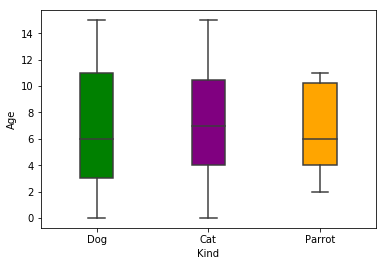

In [147]:
# Making the desired boxplot with Kind of pet and their age
boxplot=sns.boxplot(x='Kind',y='Age',data=box, width=0.3)

# Choosing colors as per the question
custom_colors=["green","purple","orange"]

#Making a list of unique pet types
pets_kind = box.Kind.unique().tolist()

# Making a dictionary with unique pet Kind as key and color as value
color_dict = dict(zip(pets_kind, custom_colors))

# Using artist and set_facecolor functions in seaborn boxplot, iterating through each bar in boxplot to cutomize the color
# -- of each box as per the dictionary we just made
for i in range(0,3):
    custom_box = boxplot.artists[i]
    custom_box.set_facecolor(color_dict[pets_kind[i]])
#plt.legend(edgecolor='b')
#plt.show()

## BONUS
- Please upload a script with a user-defined function that accepts OwnerID as an input and returns a vector of pet names for the given OwnerID.

In [70]:
def bonus_script(x):
    import pandas
    pets = pd.read_csv(r'C:\Users\nick2\Desktop\MS\Denver Broncos\pets.csv')
    pet_names=pets[pets['OwnerID']==x].Name.to_list()
    print('Pets for OwnerID {}: {}'.format(x,pet_names))
print('Please enter Owner ID:')
bonus_script(int(input()))

Please enter Owner ID:
1306
Pets for OwnerID 1306: ['Danger', 'Collette']
